In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [37]:
# Load listings and calendar CSVs
listings = pd.read_csv("C:\\Users\\dell\\Desktop\\YAHYA\\CSV FILES\\listings.csv")
calendar = pd.read_csv(r"C:\Users\dell\Desktop\YAHYA\CSV FILES\calendar_data.csv", low_memory=False)

In [38]:
# Preview top rows
print("Listings sample:")
display(listings[['id', 'name', 'neighbourhood', 'room_type', 'price']].head())

print("\nCalendar sample:")
display(calendar[['listing_id', 'date', 'available', 'price']].head())

Listings sample:


,id,name,neighbourhood,room_type,price
0,18674,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Entire home/apt,179.0
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",el Besòs i el Maresme,Entire home/apt,251.0
2,32711,Sagrada Familia area - Còrsega 1,el Camp d'en Grassot i Gràcia Nova,Entire home/apt,104.0
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,el Barri Gòtic,Entire home/apt,157.0
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,el Barri Gòtic,Entire home/apt,401.0



Calendar sample:


,listing_id,date,available,price
0,18674,2025-03-06,t,$95.00
1,18674,2025-03-07,t,$95.00
2,18674,2025-03-08,t,$95.00
3,18674,2025-03-09,t,$95.00
4,18674,2025-03-10,t,$95.00


In [33]:
# Clean price column
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Remove luxury outliers
listings = listings[listings['price'] < listings['price'].quantile(0.95)]

# Drop rows with missing essential fields
listings = listings.dropna(subset=['price', 'room_type', 'neighbourhood'])

# Preview cleaned
listings[['price', 'room_type', 'calculated_host_listings_count']].head()

,price,room_type,calculated_host_listings_count
0,179.0,Entire home/apt,29
2,104.0,Entire home/apt,3
3,157.0,Entire home/apt,3
5,46.0,Private room,1
6,149.0,Entire home/apt,7


In [40]:
# Convert date and price
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Create booking status and time features
calendar['is_booked'] = calendar['available'].apply(lambda x: 0 if x == 't' else 1)
calendar['month'] = calendar['date'].dt.month
calendar['weekday'] = calendar['date'].dt.day_name()

calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,is_booked,month,weekday
0,18674,2025-03-06,t,95.0,NaN,2.0,999.0,0,3,Thursday
1,18674,2025-03-07,t,95.0,NaN,2.0,999.0,0,3,Friday
2,18674,2025-03-08,t,95.0,NaN,2.0,999.0,0,3,Saturday
3,18674,2025-03-09,t,95.0,NaN,2.0,999.0,0,3,Sunday
4,18674,2025-03-10,t,95.0,NaN,3.0,999.0,0,3,Monday


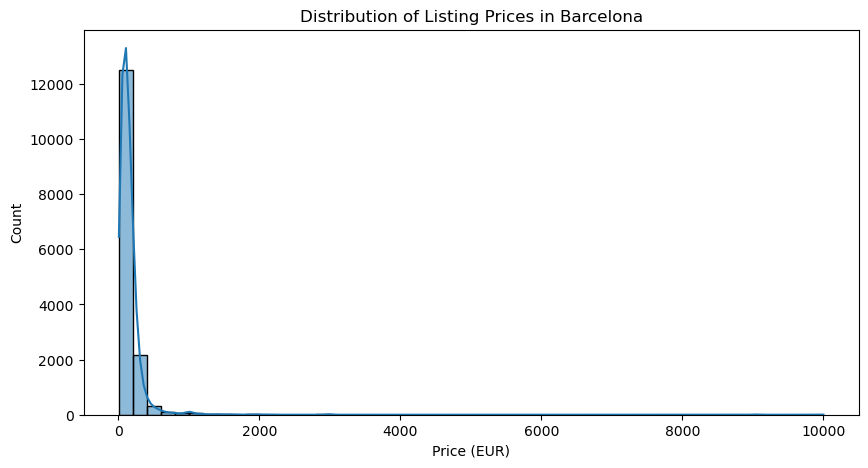

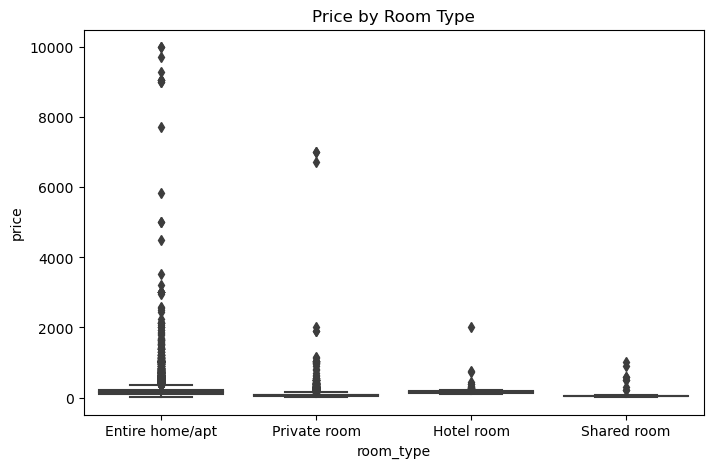

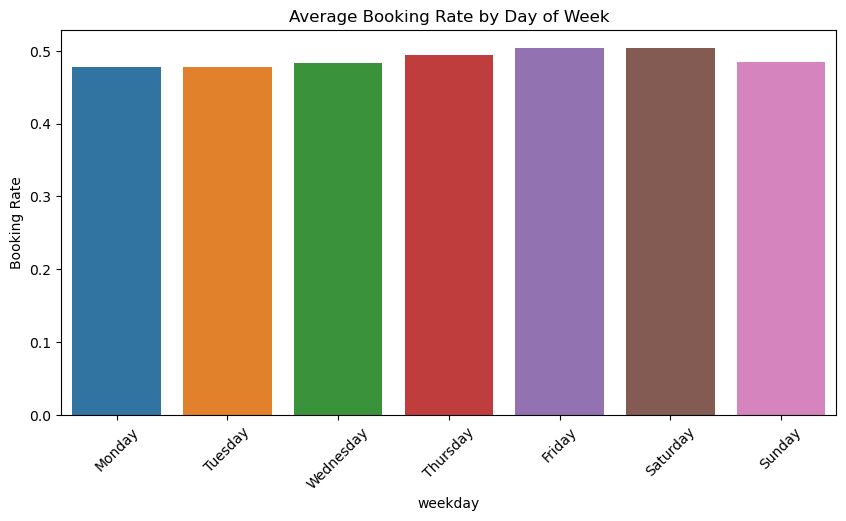

In [41]:
# Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices in Barcelona')
plt.xlabel('Price (EUR)')
plt.show()

# Average price by room type
plt.figure(figsize=(8, 5))
sns.boxplot(data=listings, x='room_type', y='price')
plt.title('Price by Room Type')
plt.show()

# Booking frequency by weekday
booking_by_day = calendar.groupby('weekday')['is_booked'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 5))
sns.barplot(x=booking_by_day.index, y=booking_by_day.values)
plt.title('Average Booking Rate by Day of Week')
plt.ylabel('Booking Rate')
plt.xticks(rotation=45)
plt.show()

In [43]:
listings.to_csv('cleaned_listings.csv', index=False)
calendar.to_csv('cleaned_calendar.csv', index=False)